## KNN OPTIMIZED CODE WITH BALANCING WITH SMOTE & NORMALIZATION


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1]

y = df.iloc[:, -1]

## Splitting & Using KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()

training_time = end_time - start_time

print(f"Training time: {training_time} seconds")


Training time: 0.05872845649719238 seconds


## Using Evaluation Metrics

Accuracy =  87.32394366197182 %
Precision =  0.8306686255869558
Recall =  0.7337013737875807
F1-score =  0.7743627706783492


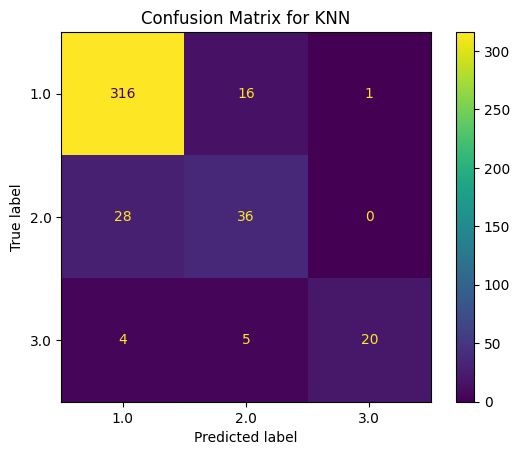

Classification Report
              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       333
         2.0       0.63      0.56      0.60        64
         3.0       0.95      0.69      0.80        29

    accuracy                           0.87       426
   macro avg       0.83      0.73      0.77       426
weighted avg       0.87      0.87      0.87       426



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay,confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN')
plt.show()

# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

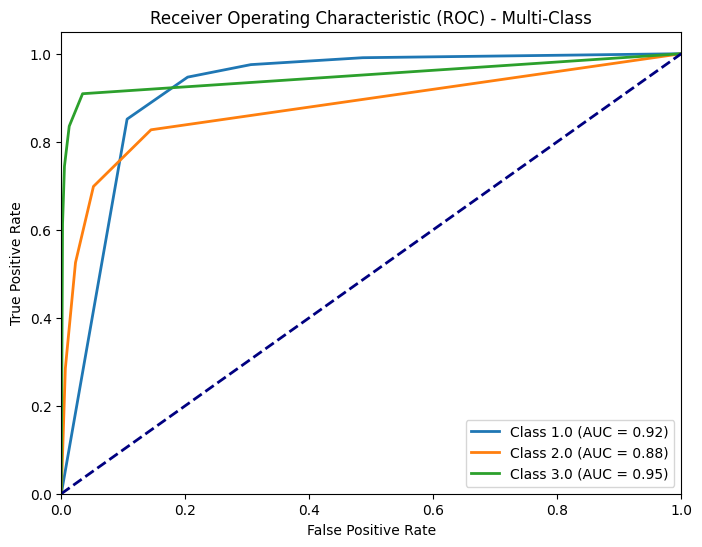

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

X = X.values  
y = y.values

knn = KNeighborsClassifier(n_neighbors=4)
cv = LeaveOneOut()

y_true = []
y_probs = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)

    y_prob = knn.predict_proba(X_test)

    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    y_true.extend(y_test_binarized)
    y_probs.extend(y_prob)

y_true = np.array(y_true)
y_probs = np.array(y_probs)

n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

class_labels = np.unique(y)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-Class')
plt.legend(loc="lower right")
plt.show()


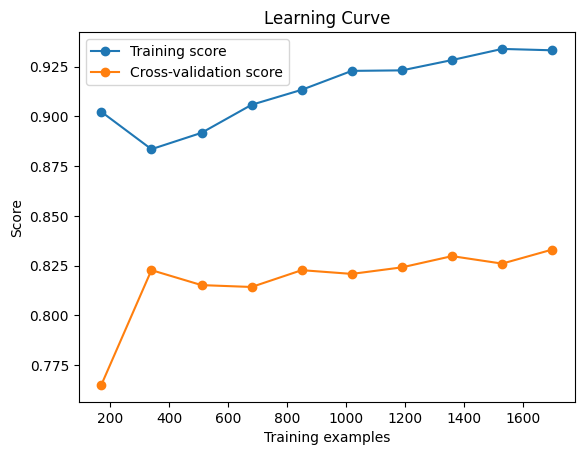

In [8]:
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

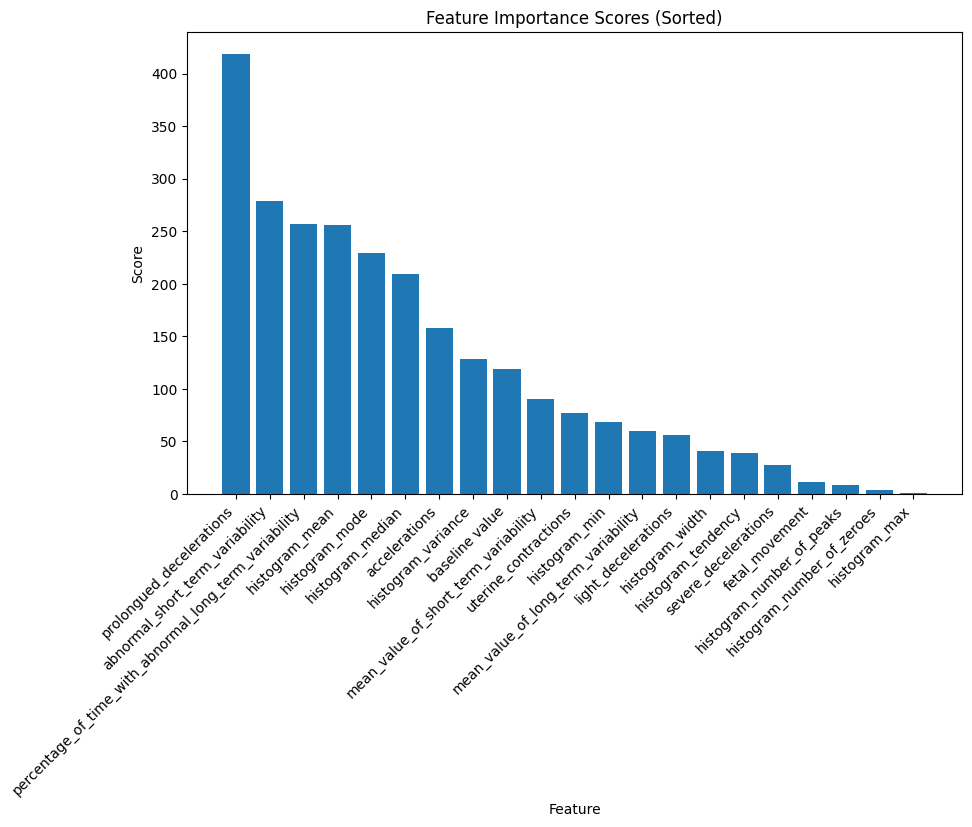

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming X, y are your feature matrix and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Use SelectKBest to get feature scores
k_best = SelectKBest(score_func=f_classif, k='all')
k_best.fit(X_train, y_train)

# Get feature scores and corresponding feature names
feature_scores = k_best.scores_
feature_names = X.columns

# Sort features based on scores
sorted_indices = feature_scores.argsort()[::-1]
sorted_feature_scores = feature_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_scores)), sorted_feature_scores, tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Importance Scores (Sorted)')
plt.xticks(rotation=45, ha="right")
plt.show()


In [10]:
top_k_features_indices = sorted_indices[:12]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]

Indices of Important Features: [ 6  7  9 17 16 18  1 19  0  8  3 12]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


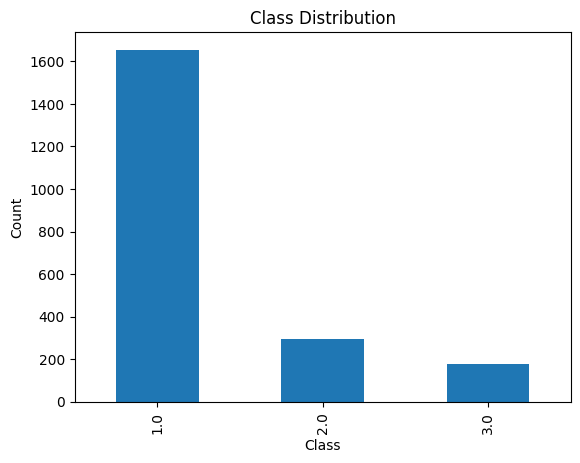

In [11]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [12]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)




Class Distribution:
fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


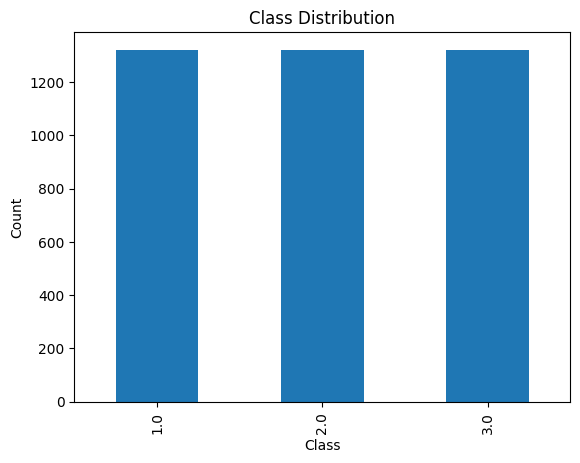

In [13]:
y_resampled_series = pd.Series(y_resampled)

class_distribution = y_resampled_series.value_counts()
mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using KNN

In [14]:

from sklearn.model_selection import cross_val_predict, StratifiedKFold

# y_pred_res = knn_after_smote.predict(X_test)
knn_after_resample = KNeighborsClassifier(n_neighbors=4) 
knn_after_resample.fit(X_resampled, y_resampled)

# cv = LeaveOneOut()
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# y_pred_res = cross_val_predict(knn_after_resample, X_resampled, y_resampled, cv=cv)


y_pred_full = knn_after_resample.predict(X_resampled)
y_pred_test = knn_after_resample.predict(X_test)


## Using Evaluation Metrics

Accuracy (Resampled): 97.70549672213818 %
Precision (macro, Resampled): 0.9772789708111813
Recall (macro, Resampled): 0.9770549672213819
F1-score (macro, Resampled): 0.9770501608311989
Confusion Matrix (Resampled):


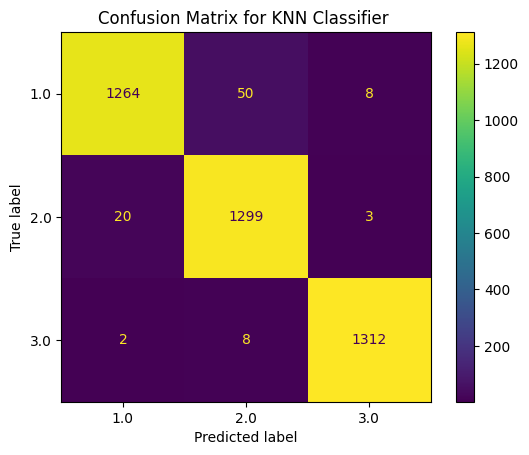

Classification Report (Resampled):
              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97      1322
         2.0       0.96      0.98      0.97      1322
         3.0       0.99      0.99      0.99      1322

    accuracy                           0.98      3966
   macro avg       0.98      0.98      0.98      3966
weighted avg       0.98      0.98      0.98      3966

Test Accuracy: 88.96713615023474 %
Test Precision (macro): 0.8103738659294214
Test Recall (macro): 0.8268834567325948
Test F1-score (macro): 0.8172378202471302


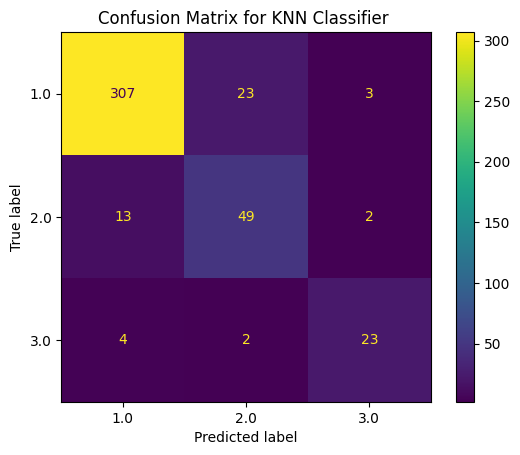

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)
class_report_resampled = classification_report(y_resampled, y_pred_full)

print("Accuracy (Resampled):", accuracy_resampled * 100, "%")
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

print("Confusion Matrix (Resampled):")
conf_matrix = confusion_matrix(y_resampled, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier ')
plt.show()
print("Classification Report (Resampled):")
print(class_report_resampled)


test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy * 100, "%")
print("Test Precision (macro):", test_precision)
print("Test Recall (macro):", test_recall)
print("Test F1-score (macro):", test_f1)

conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier ')
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# k-Fold with SMOTE
kf = KFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
accuracy_scores_kfold = []
precision_scores_kfold = []
recall_scores_kfold = []
f1_scores_kfold = []

for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE only on the training set
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # k-Nearest Neighbors on resampled training set
    knn_after = KNeighborsClassifier()
    knn_after.fit(X_train_resampled, y_train_resampled)

    # Predictions on the test set
    y_pred_test = knn_after.predict(X_test)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    accuracy_scores_kfold.append(accuracy_test)
    precision_scores_kfold.append(precision_test)
    recall_scores_kfold.append(recall_test)
    f1_scores_kfold.append(f1_test)

# Calculate mean scores across folds
mean_accuracy_kfold = np.mean(accuracy_scores_kfold)
mean_precision_kfold = np.mean(precision_scores_kfold)
mean_recall_kfold = np.mean(recall_scores_kfold)
mean_f1_kfold = np.mean(f1_scores_kfold)

print(f'k-Fold Metrics (Mean): Accuracy={mean_accuracy_kfold}, Precision={mean_precision_kfold}, Recall={mean_recall_kfold}, F1-Score={mean_f1_kfold}')


# Stratified k-Fold with SMOTE
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
accuracy_scores_stratified_kfold = []
precision_scores_stratified_kfold = []
recall_scores_stratified_kfold = []
f1_scores_stratified_kfold = []

for train_index, test_index in skf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE only on the training set
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # k-Nearest Neighbors on resampled training set
    knn_after = KNeighborsClassifier()
    knn_after.fit(X_train_resampled, y_train_resampled)

    # Predictions on the test set
    y_pred_test = knn_after.predict(X_test)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    accuracy_scores_stratified_kfold.append(accuracy_test)
    precision_scores_stratified_kfold.append(precision_test)
    recall_scores_stratified_kfold.append(recall_test)
    f1_scores_stratified_kfold.append(f1_test)

# Calculate mean scores across folds
mean_accuracy_stratified_kfold = np.mean(accuracy_scores_stratified_kfold)
mean_precision_stratified_kfold = np.mean(precision_scores_stratified_kfold)
mean_recall_stratified_kfold = np.mean(recall_scores_stratified_kfold)
mean_f1_stratified_kfold = np.mean(f1_scores_stratified_kfold)

print(f'Stratified k-Fold Metrics (Mean): Accuracy={mean_accuracy_stratified_kfold}, Precision={mean_precision_stratified_kfold}, Recall={mean_recall_stratified_kfold}, F1-Score={mean_f1_stratified_kfold}')


k-Fold Metrics (Mean): Accuracy=0.868310430029877, Precision=0.7788129661121194, Recall=0.8575329713442729, F1-Score=0.808991546580178
Stratified k-Fold Metrics (Mean): Accuracy=0.8593676989082877, Precision=0.7611908445828984, Recall=0.8491368159230638, F1-Score=0.7954411443780103


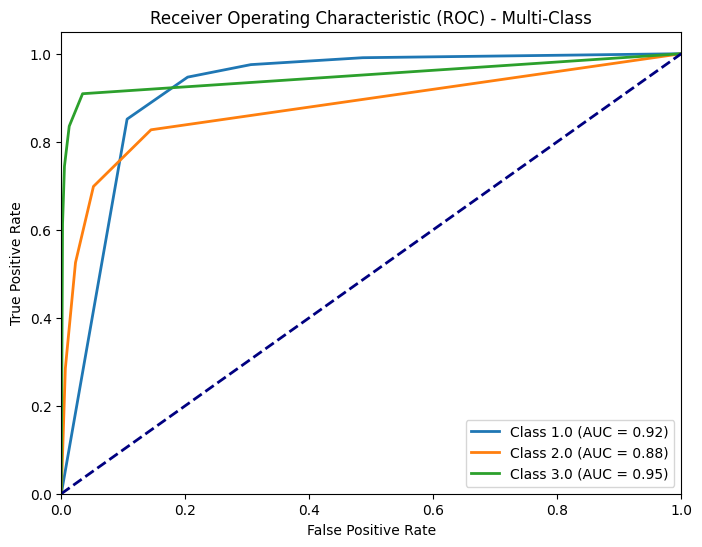

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

X = X.values  
y = y.values

knn = KNeighborsClassifier(n_neighbors=4)
cv = LeaveOneOut()

y_true = []
y_probs = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)

    y_prob = knn.predict_proba(X_test)

    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    y_true.extend(y_test_binarized)
    y_probs.extend(y_prob)

y_true = np.array(y_true)
y_probs = np.array(y_probs)

n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

class_labels = np.unique(y)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-Class')
plt.legend(loc="lower right")
plt.show()


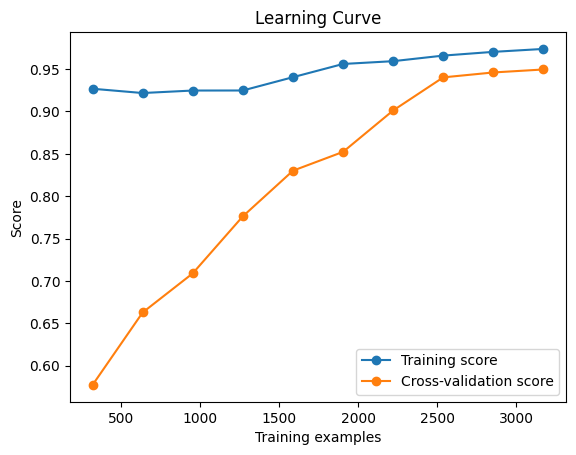

In [18]:
train_sizes, train_scores, test_scores = learning_curve(knn_after_resample, X_resampled, y_resampled, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()